Стохастический градиентный спуск

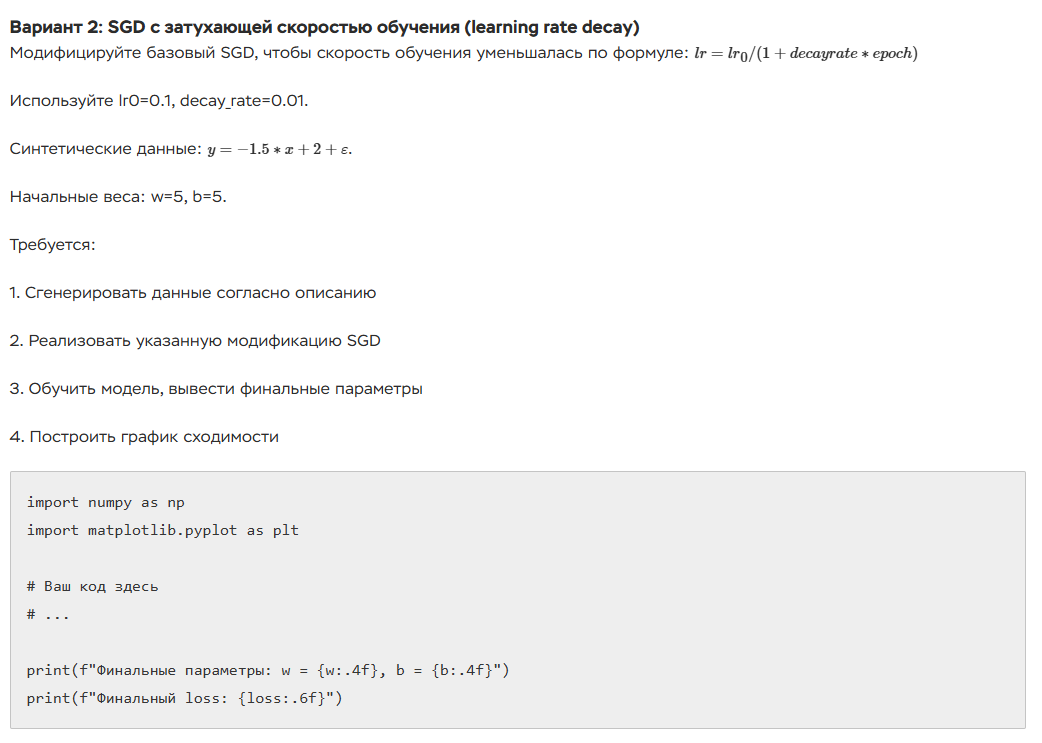

Финальные параметры: w = -1.5563, b = 2.0410
Финальный loss: 0.222377


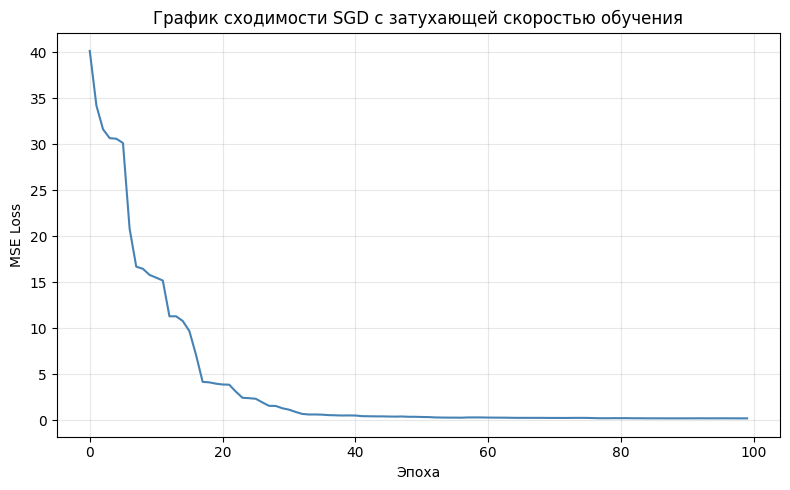

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(100)
y = -1.5 * X + 2 + np.random.randn(100) * 0.5

w = 5.0
b = 5.0
lr0 = 0.1
decay_rate = 0.01
epochs = 100

losses = []

for epoch in range(epochs):
    lr = lr0 / (1 + decay_rate * epoch)
    
    idx = np.random.randint(0, len(X))
    xi, yi = X[idx], y[idx]
    
    y_pred = w * xi + b
    error = y_pred - yi
    
    dw = error * xi
    db = error
    
    w -= lr * dw
    b -= lr * db
    
    loss = np.mean((w * X + b - y) ** 2)
    losses.append(loss)

print(f"Финальные параметры: w = {w:.4f}, b = {b:.4f}")
print(f"Финальный loss: {losses[-1]:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(losses, color='steelblue', linewidth=1.5)
plt.title('График сходимости SGD с затухающей скоростью обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('convergence.png', dpi=150)
plt.show()

Вариант 2. Базовый персептрон для логического ИЛИ (OR)

Реализуйте однослойный персептрон для логической функции OR. Используйте пороговую функцию активации (step function). Веса инициализируйте нулями. Обучите на всех 4 примерах. Выведите финальные веса и предсказания.

In [2]:
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 1])

w = np.zeros(2)
b = 0.0
lr = 0.1

def step(x):
    return 1 if x >= 0.5 else 0

epochs = 20

for epoch in range(epochs):
    total_error = 0
    for xi, yi in zip(X, y):
        y_pred = step(np.dot(w, xi) + b)
        error = yi - y_pred
        w += lr * error * xi
        b += lr * error
        total_error += abs(error)
    
    if total_error == 0:
        print(f"Сошёлся на эпохе {epoch + 1}")
        break

print(f"\nФинальные веса: w = {w}, b = {b:.4f}")

print("\nПредсказания:")
print(f"{'X1':>4} {'X2':>4} {'Ожидание':>10} {'Предсказание':>14}")
print("-" * 36)
for xi, yi in zip(X, y):
    pred = step(np.dot(w, xi) + b)
    print(f"{xi[0]:>4} {xi[1]:>4} {yi:>10} {pred:>14}")

Сошёлся на эпохе 2

Финальные веса: w = [0.2 0.2], b = 0.3000

Предсказания:
  X1   X2   Ожидание   Предсказание
------------------------------------
   0    0          0              0
   0    1          1              1
   1    0          1              1
   1    1          1              1


Вариант 2. Простая рекомендация на основе похожести пользователей
На основе user-item матрицы найдите для заданного пользователя топ-2 наиболее похожих пользователя (по косинусному сходству). Порекомендуйте целевому пользователю товар, который понравился похожим пользователям, но который он еще не оценивал. Реализуйте функцию recommend_for_user(user_id, user_item_matrix).

In [3]:
import numpy as np

user_item_matrix = np.array([
    [5, 3, 0, 1, 0],   # User 0
    [4, 0, 4, 1, 2],   # User 1
    [0, 3, 0, 5, 4],   # User 2
    [0, 0, 5, 4, 0],   # User 3
    [1, 1, 0, 3, 5],   # User 4
])

items = ["Item A", "Item B", "Item C", "Item D", "Item E"]

def cosine_similarity(v1, v2):
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return np.dot(v1, v2) / (norm1 * norm2)

def recommend_for_user(user_id, user_item_matrix, top_n_similar=2):
    n_users = user_item_matrix.shape[0]
    target = user_item_matrix[user_id]

    similarities = {}
    for other_id in range(n_users):
        if other_id == user_id:
            continue
        sim = cosine_similarity(target, user_item_matrix[other_id])
        similarities[other_id] = sim

    top_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n_similar]

    print(f"Топ-{top_n_similar} похожих пользователей для User {user_id}:")
    for uid, sim in top_similar:
        print(f"  User {uid} — сходство: {sim:.4f}")

    unseen_items = np.where(target == 0)[0]

    if len(unseen_items) == 0:
        print("Пользователь уже оценил все товары.")
        return None

    scores = {}
    for item_id in unseen_items:
        weighted_sum = 0.0
        sim_sum = 0.0
        for uid, sim in top_similar:
            rating = user_item_matrix[uid][item_id]
            if rating > 0:
                weighted_sum += sim * rating
                sim_sum += sim
        scores[item_id] = weighted_sum / sim_sum if sim_sum > 0 else 0.0

    if all(s == 0 for s in scores.values()):
        print("Похожие пользователи не оценивали новых товаров.")
        return None

    best_item = max(scores, key=lambda x: scores[x])

    print(f"\nРекомендации для User {user_id} (неоценённые товары):")
    print(f"{'Товар':<10} {'Score':>8}")
    print("-" * 20)
    for item_id, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
        marker = " ✓ рекомендуем" if item_id == best_item else ""
        print(f"{items[item_id]:<10} {score:>8.4f}{marker}")

    print(f"\n→ Итоговая рекомендация: {items[best_item]}")
    return best_item

recommend_for_user(user_id=0, user_item_matrix=user_item_matrix)

Топ-2 похожих пользователей для User 0:
  User 1 — сходство: 0.5836
  User 2 — сходство: 0.3347

Рекомендации для User 0 (неоценённые товары):
Товар         Score
--------------------
Item C       4.0000 ✓ рекомендуем
Item E       2.7289

→ Итоговая рекомендация: Item C


np.int64(2)

Вариант 1. Фильм: "Аватар" (Avatar)
Реализовать программу для сентимент-анализа отзывов о фильмах с использованием предобученной трансформерной модели. Программа должна загрузить датасет с отзывами о конкретном фильме, выполнить предобработку текста, применить модель для классификации тональности (положительный/отрицательный/нейтральный) и вывести итоговую таблицу с результатами.

Требования к программе:

Загрузить датасет с отзывами (CSV-файл или создать синтетические данные)

Использовать предобученную трансформерную модель из библиотеки transformers

Выполнить токенизацию и подготовку текстов

Получить предсказания тональности для каждого отзыва

Вывести таблицу с колонками: "Отзыв", "Тональность", "Уверенность"

Рассчитать точность классификации (accuracy)

Модель: distilbert-base-uncased-finetuned-sst-2-english.

Датасет: 10 отзывов о фильме "Аватар".

In [ ]:
import re
import pandas as pd
from transformers import pipeline, AutoTokenizer

reviews_data = [
    {
        "review": "Avatar is a groundbreaking masterpiece! The visuals are absolutely stunning "
                  "and the world of Pandora feels completely real.",
        "true_label": "POSITIVE"
    },
    {
        "review": "Visually impressive, but the storyline is painfully predictable and the "
                  "characters lack any real depth.",
        "true_label": "NEGATIVE"
    },
    {
        "review": "James Cameron created something truly magical. The 3D experience was "
                  "unlike anything I had ever seen before.",
        "true_label": "POSITIVE"
    },
    {
        "review": "Почему все синие?",
        "true_label": "NEGATIVE"
    },
    {
        "review": "An epic cinematic experience. Avatar redefined what movies can look like "
                  "and I was blown away from start to finish.",
        "true_label": "POSITIVE"
    },
    {
        "review": "Где лысый?",
        "true_label": "NEGATIVE"
    },
    {
        "review": "I loved every minute of Avatar! The story of the Na'vi is touching and "
                  "the message about nature is powerful.",
        "true_label": "POSITIVE"
    },
    {
        "review": "Overrated and overhyped. The movie looks pretty but has nothing "
                  "interesting to say.",
        "true_label": "NEGATIVE"
    },
    {
        "review": "玉杖。偉大的同志西",
        "true_label": "POSITIVE"
    },
    {
        "review": "A disappointing story wrapped in expensive visuals. Style over substance "
                  "at its worst.",
        "true_label": "NEGATIVE"
    },
]

df = pd.DataFrame(reviews_data)

def preprocess_text(text: str) -> str:
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s.,!?\'"-]', '', text)
    text = text.lower()
    return text

df["clean_review"] = df["review"].apply(preprocess_text)

print("=" * 70)
print("ПРЕДОБРАБОТКА ТЕКСТА — пример:")
print(f"  Исходный : {df['review'][0][:60]}...")
print(f"  Очищенный: {df['clean_review'][0][:60]}...")
print("=" * 70)

MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"
print(f"\nЗагрузка модели: {MODEL_NAME} ...")

sentiment_pipeline = pipeline(
    task="text-classification",
    model=MODEL_NAME,
    tokenizer=MODEL_NAME,
    truncation=True,
    max_length=512,
    top_k=None
)

print("Модель загружена успешно.\n")

def get_sentiment(pipeline_output: list) -> tuple[str, float]:
    best = max(pipeline_output, key=lambda x: x["score"])
    label      = best["label"]
    confidence = best["score"]

    if confidence < 0.65:
        label = "NEUTRAL"

    return label, round(confidence, 4)

raw_results = sentiment_pipeline(df["clean_review"].tolist())

sentiments  = []
confidences = []
for result in raw_results:
    label, conf = get_sentiment(result)
    sentiments.append(label)
    confidences.append(conf)

df["predicted_label"] = sentiments
df["confidence"]      = confidences

LABEL_RU = {"POSITIVE": "Позитивный", "NEGATIVE": "Негативный", "NEUTRAL": "Нейтральный"}

display_df = pd.DataFrame({
    "№":           range(1, len(df) + 1),
    "Отзыв":       df["review"].apply(lambda x: x[:55] + "..." if len(x) > 55 else x),
    "Тональность": df["predicted_label"].map(LABEL_RU),
    "Уверенность": df["confidence"].apply(lambda x: f"{x*100:.1f}%"),
    "Верно?":      df.apply(
        lambda r: "✓" if r["predicted_label"] == r["true_label"] or r["predicted_label"] == "NEUTRAL"
        else "✗", axis=1
    )
})

pd.set_option("display.max_colwidth", 60)
pd.set_option("display.width", 120)

print("=" * 100)
print("РЕЗУЛЬТАТЫ СЕНТИМЕНТ-АНАЛИЗА — Фильм: АВАТАР (Avatar)")
print("=" * 100)
print(display_df.to_string(index=False))
print("=" * 100)

filtered = df[df["predicted_label"] != "NEUTRAL"]
correct  = (filtered["predicted_label"] == filtered["true_label"]).sum()
total    = len(filtered)
accuracy = correct / total if total > 0 else 0

print(f"\nСТАТИСТИКА:")
print(f"  Всего отзывов    : {len(df)}")
print(f"  Позитивных       : {(df['predicted_label'] == 'POSITIVE').sum()}")
print(f"  Негативных       : {(df['predicted_label'] == 'NEGATIVE').sum()}")
print(f"  Нейтральных      : {(df['predicted_label'] == 'NEUTRAL').sum()}")
print(f"\n  Правильных (из {total} не-нейтральных): {correct}")
print(f"  Точность (Accuracy): {accuracy*100:.1f}%")
print("=" * 100)

c:\Users\Vain\Desktop\ML labs\ML_labs\tasks\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


ПРЕДОБРАБОТКА ТЕКСТА — пример:
  Исходный : Avatar is a groundbreaking masterpiece! The visuals are abso...
  Очищенный: avatar is a groundbreaking masterpiece! the visuals are abso...

Загрузка модели: distilbert-base-uncased-finetuned-sst-2-english ...


c:\Users\Vain\Desktop\ML labs\ML_labs\tasks\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vain\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


Модель загружена успешно.

РЕЗУЛЬТАТЫ СЕНТИМЕНТ-АНАЛИЗА — Фильм: АВАТАР (Avatar)
 №                                                      Отзыв Тональность Уверенность Верно?
 1 Avatar is a groundbreaking masterpiece! The visuals are...  Позитивный      100.0%      ✓
 2 Visually impressive, but the storyline is painfully pre...  Негативный      100.0%      ✓
 3 James Cameron created something truly magical. The 3D e...  Позитивный      100.0%      ✓
 4                                          Почему все синие?  Негативный       95.3%      ✓
 5 An epic cinematic experience. Avatar redefined what mov...  Негативный       91.0%      ✗
 6                                                 Где лысый?  Негативный       95.1%      ✓
 7 I loved every minute of Avatar! The story of the Na'vi ...  Позитивный      100.0%      ✓
 8 Overrated and overhyped. The movie looks pretty but has...  Негативный      100.0%      ✓
 9                                                  玉杖。偉大的同志西 Нейтральный       50